In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [86]:
sns.get_dataset_names()# here also we can get those datsets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [51]:
df=pd.read_csv("T:/python/class/class_19/Iris.csv")

In [52]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [53]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [56]:
# convert categorical to numeric
le=LabelEncoder()
res=le.fit_transform(df['Species'])
df['species_transform']=res

In [58]:
df['species_transform'].value_counts()

0    50
1    50
2    50
Name: species_transform, dtype: int64

In [59]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_transform
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [60]:
df=df.drop(['Species','Id'],axis=1)

In [61]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_transform
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
# split the data 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [63]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
# data given to algorithmn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [88]:
# algorithm learn the data and given to model to do predictions
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)


DecisionTreeClassifier()

In [89]:
y_train_predict=dc.predict(x_train)

In [90]:
y_test_predict=dc.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [92]:
print(f'test accuracy:{accuracy_score(y_test,y_test_predict)}')

test accuracy:0.98


In [93]:
print(f'test classification_report:{classification_report(y_test,y_test_predict)}')

test classification_report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [94]:
print(f'test confusion_matrix:{confusion_matrix(y_test,y_test_predict)}')

test confusion_matrix:[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [95]:
# no of observation for predictions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [101]:
a=list(range(1,100,3))
scores=[]
for i in a:
    ac=AdaBoostClassifier(estimator=lr,n_estimators=i,learning_rate=1.0)
    ac.fit(x_train,y_train)
    y_test_predict1=ac.predict(x_test)
    curr=accuracy_score(y_test,y_test_predict1)
    scores.append(curr)

In [102]:
scores

[0.86,
 0.92,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94]

In [103]:
# plot by graphical representation

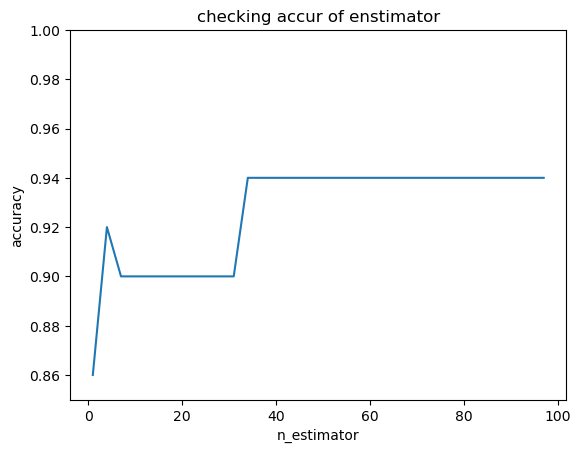

In [104]:
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.title("checking accur of enstimator")
plt.plot(a,scores)
plt.ylim(0.85,1)
plt.show()

In [80]:
max(scores)

0.9666666666666667